In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error as mse,root_mean_squared_error as rmse


In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [4]:
df['duration'] = round(((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds())/60,1)
df = df[(df['duration']>0) & (df['duration']<60)]
df['route'] =  df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)

In [5]:
train_dict = df[['route']].to_dict(orient = 'records')

In [6]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [7]:
target = 'duration'
y_train = df[target]

In [8]:
lc = LinearRegression()
lc.fit(X_train, y_train)
y_predict = lc.predict(X_train)

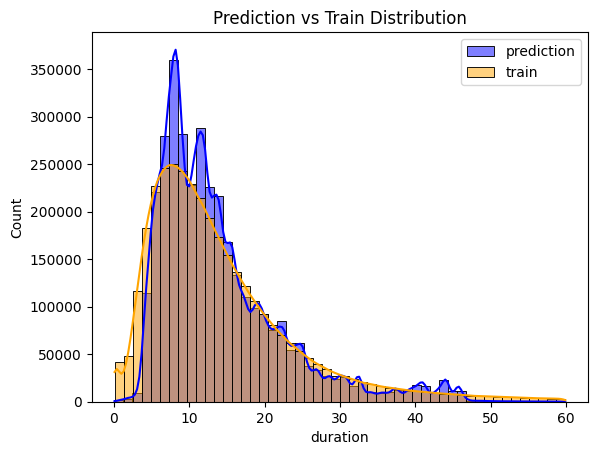

4.874154634393926

In [9]:
sns.histplot(y_predict, label='prediction', color='blue', kde=True,bins = 50)
sns.histplot(y_train, label='train', color='orange', kde=True,bins = 50)
plt.legend()
plt.title('Prediction vs Train Distribution')
plt.show()
mse(y_train, y_predict)
rmse(y_train, y_predict)

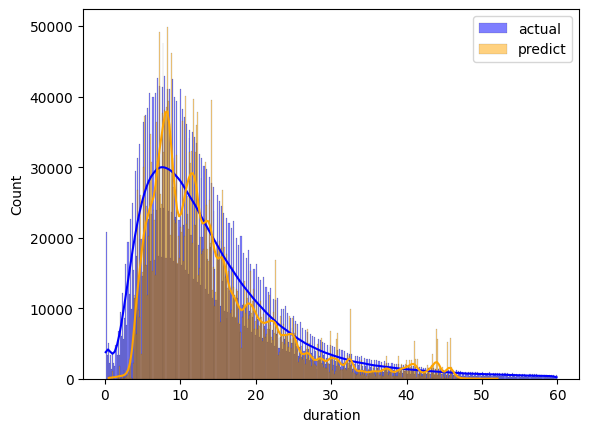

4.896936358810153

In [12]:
lc2 = Ridge()
lc2.fit(X_train, y_train)
y_predict = lc2.predict(X_train)
sns.histplot(y_train, label = 'actual', color = 'blue', kde = True)
sns.histplot(y_predict, label = 'predict', color = 'orange', kde = True)
plt.legend()
plt.show()
mse(y_train, y_predict)
rmse(y_train, y_predict)